C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Enter the number of forecast days: 14


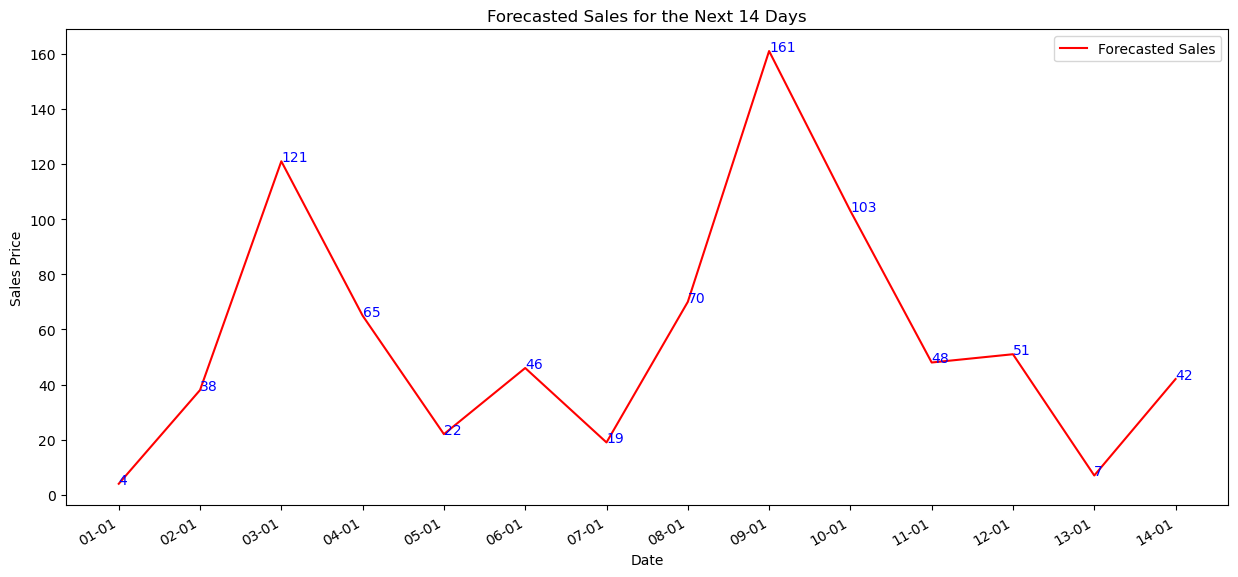

2023-01-01      4
2023-01-02     38
2023-01-03    121
2023-01-04     65
2023-01-05     22
2023-01-06     46
2023-01-07     19
2023-01-08     70
2023-01-09    161
2023-01-10    103
2023-01-11     48
2023-01-12     51
2023-01-13      7
2023-01-14     42
Freq: D, dtype: int32


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read data from an Excel file into a Pandas DataFrame
df = pd.read_excel('Kako.xlsx', sheet_name='Last_update')

# Assuming your data has a 'date' column and a 'sales_price' column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Apply Exponential Smoothing
model = ExponentialSmoothing(df[' sales_price'], seasonal='add', seasonal_periods=30)
fit_model = model.fit()

# Predict future sales for the next 30 days
forecast_days = int(input("Enter the number of forecast days: "))
forecast = fit_model.forecast(steps=forecast_days)

# Convert the forecasted values to integers
forecast_int = forecast.astype(int)

# Plot the historical sales data and the forecasted values
plt.figure(figsize=(15, 7))
plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=forecast_days, freq='D'),
         forecast_int, label='Forecasted Sales', linestyle='solid', color='red')
plt.title(f'Forecasted Sales for the Next {forecast_days} Days')
plt.xlabel('Date')
plt.ylabel('Sales Price')
plt.legend()

# Display forecasted values on the graph
for date, value in zip(pd.date_range(start=df.index[-1] + pd.DateOffset(days=1),
                                     periods=forecast_days, freq='D'), forecast_int):
    plt.text(date, value, str(value), color='blue')

plt.gca().xaxis.set_major_locator(DayLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m'))
plt.gcf().autofmt_xdate()

plt.show()
print(forecast_int)


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Enter the number of forecast days: 14


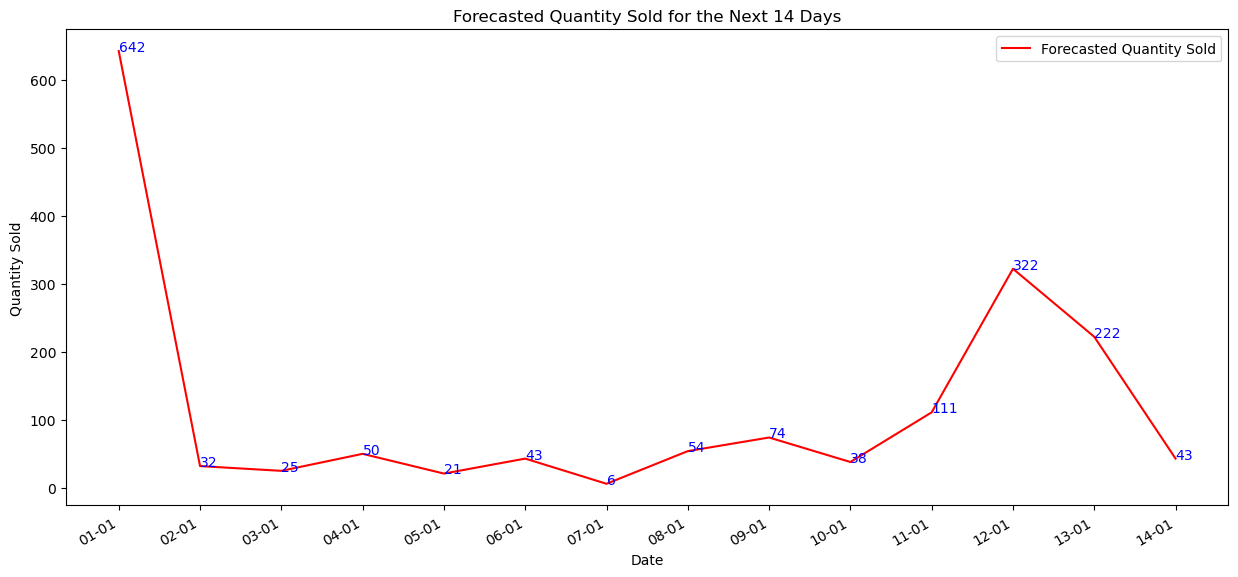

2023-01-01    642
2023-01-02     32
2023-01-03     25
2023-01-04     50
2023-01-05     21
2023-01-06     43
2023-01-07      6
2023-01-08     54
2023-01-09     74
2023-01-10     38
2023-01-11    111
2023-01-12    322
2023-01-13    222
2023-01-14     43
Freq: D, dtype: int32


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_excel('Kako.xlsx', sheet_name='Last_update')

# Assuming your data has a 'date' column and a 'Quantity_Sold' column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Apply Exponential Smoothing
model = ExponentialSmoothing(df[' Quantity_Sold'], seasonal='add', seasonal_periods=14)
fit_model = model.fit()

# Predict future sales for the next 30 days
forecast_days = int(input("Enter the number of forecast days: "))
forecast = fit_model.forecast(steps=forecast_days)

# Convert the forecasted values to integers
forecast_int = forecast.astype(int)

# Plot the historical sales data and the forecasted values
plt.figure(figsize=(15, 7))
plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=forecast_days, freq='D'),
         forecast_int, label='Forecasted Quantity Sold', linestyle='solid', color='red')

plt.title(f'Forecasted Quantity Sold for the Next {forecast_days} Days')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()

# Display forecasted values on the graph
for date, value in zip(pd.date_range(start=df.index[-1] + pd.DateOffset(days=1),
                                     periods=forecast_days, freq='D'), forecast_int):
    plt.text(date, value, str(value), color='blue')

plt.gca().xaxis.set_major_locator(DayLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m'))
plt.gcf().autofmt_xdate()

plt.show()
print(forecast_int)
